### Data for Binary Classification:
* URL: https://www.kaggle.com/datasets/isathyam31/adult-income-prediction-classification?select=data.csv
* Column “salary” is the target label to classify.



In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


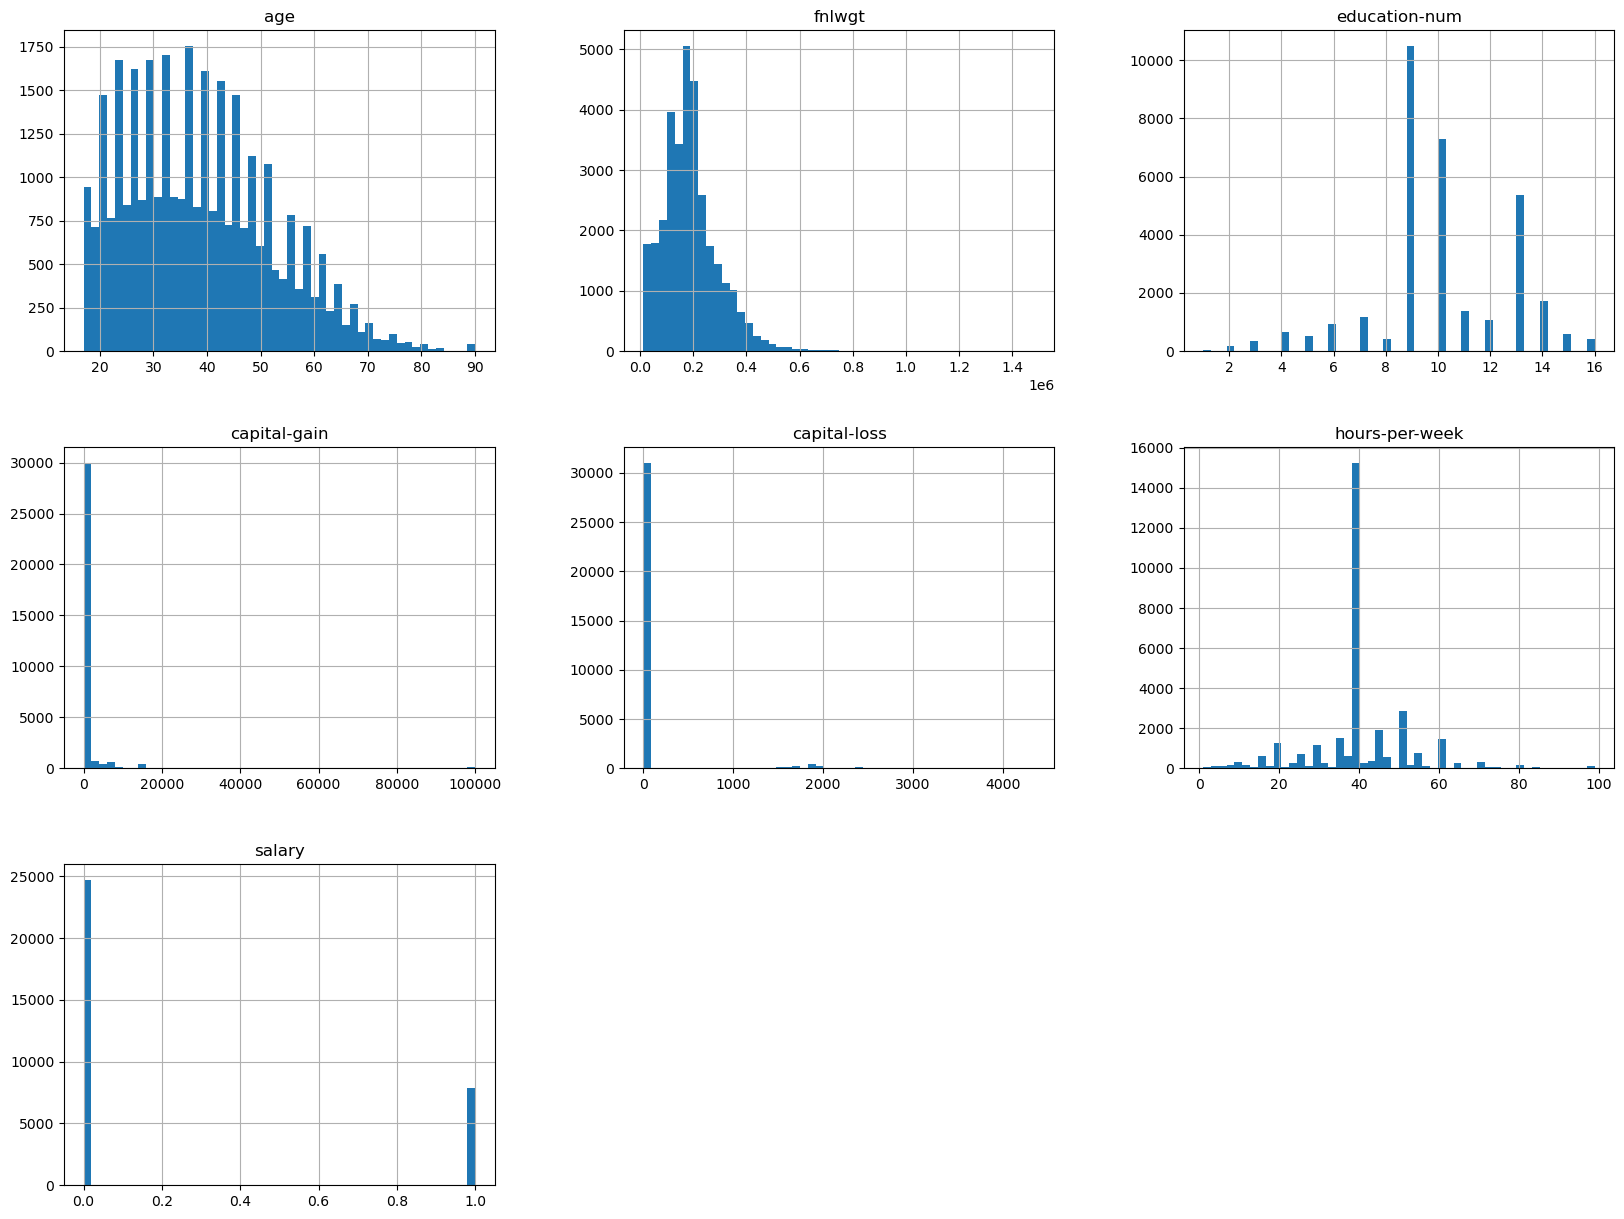

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Explanation:**
make a singular graph for:
fnlwgt because the graph above isn't clear enough. Moreover, also make singular graphs for capital gain, capital loss and capital net (added later) given that the labels arent scaled properly.


# Continuous features:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


**Based on the dataset, the continuous features are:**
age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, capital-net

Its important to note that capital-net was later added by us after reviewing the dataset.

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


**Explanation:**

From reviewing the table, its important to note the following:

**Age:** there is a wide range in terms of the ages present in the dataset, as showcased by the min. age being 17 and the max. age being 90. As expected, this may prove to be a very important feature in determining the target variable

**Education**: Particularly in the US. education is viewed as a strong factor in determining target variables such as salary. Based on the stats above, the majority of the people have around 10 years worth of education.

**Hours-per-week:** Its rather easy to see the correlation between salary and hours per week. The majority of people work their 9-5 as evidenced by the mean and there are some that go all the way to 99 hours in a week

**Regarding standard deviations shown on  the df.describe() code:**

As known, standard deviation shows how spread the data points of a feature are. If a feature has a big standard deviation, then that means that the values are spread rather much. Vice versa, then they are all more together.

Based on the table, its important to note that the following features do have rather big standard deviations:

**fnlwgt** (bigger by a huge margin)
**capital-gain**
**capital-loss **

# Categorical features:

**The dataset's categorical features are the following:**

workclass, education, marital-status, occupation, relationship, race, sex, country

Salary- taget variable, thus not included above.

Now, we'll compute correlation matrices where we calcualte Pearson correlation coefficients among all continuous features and price. A high correlation (close to 1 or -1) will let us know if a feature has strong linear predictive power (positively or negatively, respectively), while a low correlation (close to 0) will let us know if a feature has weak linear predictive power.

In [ ]:
corr_matrix = df.select_dtypes(include = ['number']).corr()
corr_matrix['salary'].sort_values(ascending=False)

salary            1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-loss      0.150526
fnlwgt           -0.009463
Name: salary, dtype: float64

In the code above, in relation to salary, the matrix showcases the following regarding each feature:

**education-num**: has a positive relationship which although weak, it's the feature that is the most positively correlated.

**age, hours-per-week, capital-gain, capital-loss**: all have weak positive correlation with salary.

**fnlwgt**: is the only feature with a weak negative correlation. Its important to note that as its quite close to 0, theres barely a linear correlation.

**Add capital-net feature**

In [ ]:
df['capital-net'] = df['capital-gain'] - df['capital-loss']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,capital-net
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0


In [ ]:
df['capital-net'].value_counts()

capital-net
 0        28330
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
-1844         1
 1111         1
 2538         1
-2489         1
-1411         1
Name: count, Length: 210, dtype: int64

In [ ]:
corr_matrix = df.select_dtypes(include = ['number']).corr()
corr_matrix['salary'].sort_values(ascending=False)

salary            1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-net       0.214428
capital-loss      0.150526
fnlwgt           -0.009463
Name: salary, dtype: float64

**Explanation:**

We added the feature capital-net given that it can aggregate capital-gain and capital-loss and thus without having to calculate by hand what the gain/loss of are of a given group of people, the table will now provide it.

Capital-net: has a weak positive correlation with salary.

**Scatter Matrix:**

Another way of checking for correlation is to use the scatter_matrix() function. Please note that it plots every numerical attribute against every other numerical attribute.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fnlwgt', ylabel='age'>,
        <Axes: xlabel='education-num', ylabel='age'>,
        <Axes: xlabel='capital-gain', ylabel='age'>,
        <Axes: xlabel='capital-net', ylabel='age'>,
        <Axes: xlabel='capital-loss', ylabel='age'>,
        <Axes: xlabel='hours-per-week', ylabel='age'>,
        <Axes: xlabel='salary', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fnlwgt'>,
        <Axes: xlabel='fnlwgt', ylabel='fnlwgt'>,
        <Axes: xlabel='education-num', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-gain', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-net', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-loss', ylabel='fnlwgt'>,
        <Axes: xlabel='hours-per-week', ylabel='fnlwgt'>,
        <Axes: xlabel='salary', ylabel='fnlwgt'>],
       [<Axes: xlabel='age', ylabel='education-num'>,
        <Axes: xlabel='fnlwgt', ylabel='education-num'>,
        <Axes: xlabel='education-num', ylabel='educat

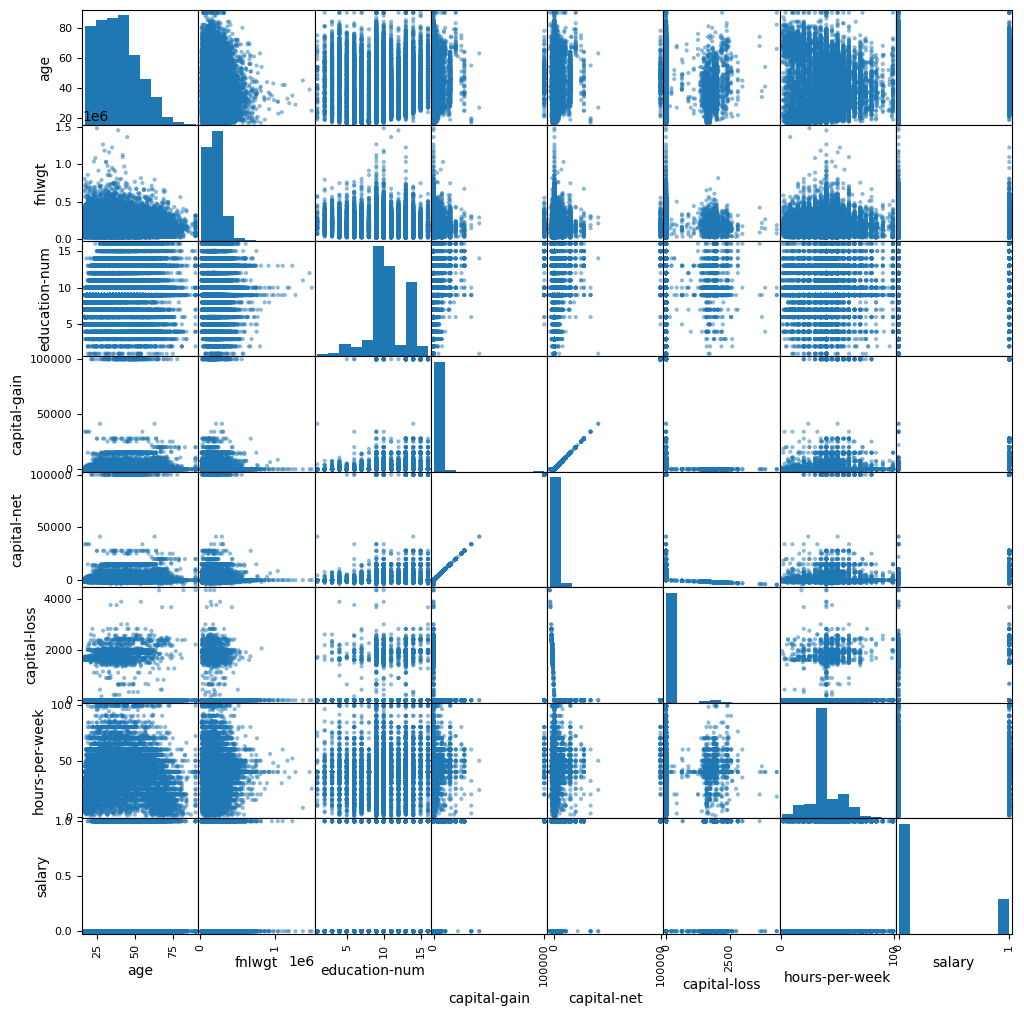

In [ ]:
attributes = ["age", "fnlwgt", "education-num", "capital-gain", "capital-net", "capital-loss", "hours-per-week", "salary"]

scatter_matrix(df[attributes], figsize=(12,12))

Problem is that salary is binary, thus, the scatter_matrix isnt suitable. Thus, we'll try boxplots next.

Boxplots

Feature- education-num

<Axes: xlabel='salary', ylabel='education-num'>

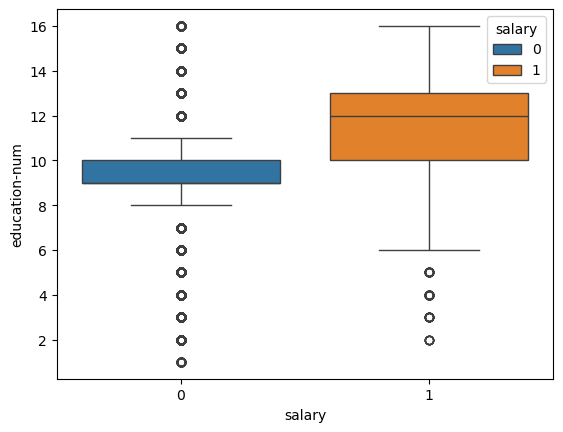

In [ ]:
sns.boxplot(x=df['salary'], y = df['education-num'], hue = "salary", data =df)

**Explanation**- There are various outliers in the group of people that earn less than 50k , but the majority have lesser education than the people on the other group. Its important to note that this box is narrower, which showcases that there is less variation. On the group of people that do earn more than 50k, the vast majority are in fact at a higher education level than the other group and there is in fact a higher variation of education levels. Its whiskers are longer, which shows that for various different education levels, there are people earning more than 50k.

**Feature- age**

<Axes: xlabel='salary', ylabel='age'>

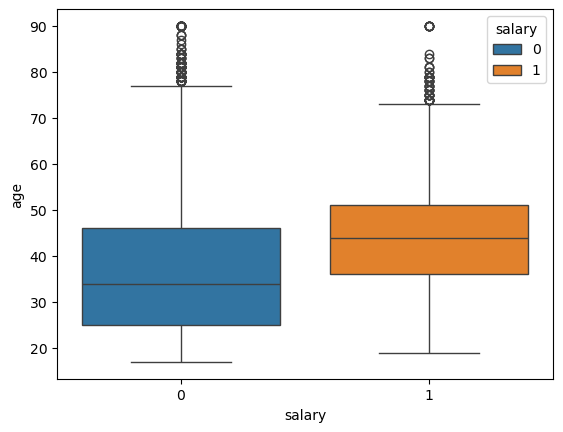

In [ ]:
sns.boxplot(x=df['salary'], y = df['age'], hue = "salary", data =df)

**Explanation**- What this chart showcases (the main idea) is that as age increases, salary increases. Moreover, in terms of the 25th and 75th percentiles, the bulk of the data for 1 "salary higher than $50k" is located at older ages than for its counterpart, 0.

**Feature- hours-per-week**

<Axes: xlabel='salary', ylabel='hours-per-week'>

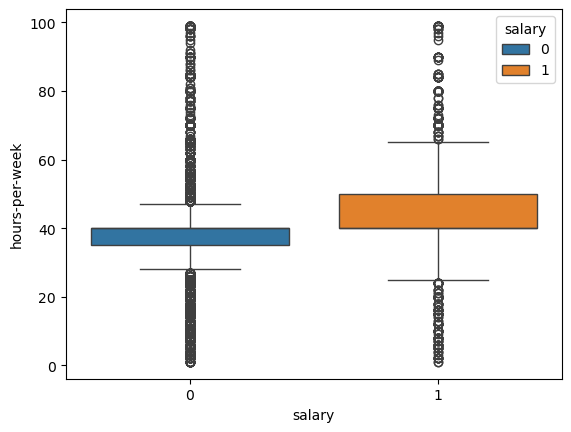

In [ ]:
sns.boxplot(x=df['salary'], y = df['hours-per-week'], hue = "salary", data =df)

**Explanation:**

This boxplot showcases that as the hours worked per week increase, there is an increase in salary. Shortly, people who earn more than $50k, do work more hours on average than those on the other group.

Also important to note that the vast majority of people on the group earning less than 50k work around 40 hours per week (a normal 9-5), thus showcasing that on average, those people are more likely to be on the group earning less than 50k.

In [ ]:
df['salary'].value_counts(normalize=True)

salary
0    0.75919
1    0.24081
Name: proportion, dtype: float64

**Explanation**- the target label is in fact unbalanced given that class 0 has a much bigger proportion than the other class, as showcased by the 76% to 24% proportions.

**Proceed to balance the class**

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state = 42)
train_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,capital-net
5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,1,0
19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,1,-1887
10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0,0
32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,0,0
9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,0,0


**Explanation:**
Splitting the data is very important because you then have a set that your model doesn't see during training, thus, when it gets evaluated, it will do so with data that it hasn't seen

We will also check fo NaNs.

**Explanation:**
Crucial step before feeding data to machine learing models, as they won't be able to handle the data if NaN's are detected.

In [ ]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
capital-net       0
dtype: int64

**Prepare the Pipelines:**

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

continuous_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "capital-net"]
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "country"]

"""
Prepare the pipelines, preprocessor,
and grid.
"""

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),

])
categorical_pipeline = Pipeline([
    ('oneHot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, continuous_columns), ('cat', categorical_pipeline, categorical_columns)
])


pipe = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE()),
    ('classifier', LogisticRegression())
])



logistic_pipe = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE()),
    ('classifier', LogisticRegression(solver = 'lbfgs', max_iter = 1000))
])

logistic_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
}

svm_pipe = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE()),
    ('classifier', SVC())
])

svm_param_grid = {
    'classifier__C' : [0.1, 1, 10, 100],
    'classifier__gamma' : [1, 0.1, 0.01, 0.001],
    'classifier__kernel' : ['rbf', 'poly', 'sigmoid']
}

knn_pipe = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE()),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],

}

**Explanation:**

1. The dataset's features were separated between continuous and categorical and that was in order to have everything organized before being fed unto the pipelines.

2. The numerical and categorical pipelines were created and then placed inside the preprocessor. That is because categorical and continuous features do need different preprocessing before being fed into a machine learning model. For example, the categorical data must be onehotencoded before it can be fed, as the model won't accept text.

3. The different pipelines for logistic regression, svm, and knn were created given that each does require its own pipeline.

4. GridsearchCV was used given that we needed to find the best hyperparemeters and what it does so well (and why it takes longer than for example randomsearch) is that it goes through every single value provided in the param_grids.

5. Given the high imbalance, SMOTE was chosen given that there is a high imbalance and we wanted to reduce the risk of overfitting that would have been faced if we simply created copies of the existing minority class.

In [ ]:
#split
x_train = train_set.drop('salary', axis=1)
y_train = train_set['salary']

#get a sample
x_sample = x_train.sample(2000, random_state = 42)
y_sample = y_train.sample(2000, random_state = 42)

**Explanation:**

For training, the dataset was split into x_train and y_train so that the features were separated from the labels, which are the answers. Please note that given that gridsearchCV searches through every single combination in order to find the best values, a sample of the data was used for x and y, thus they became x_sample and y_sample, that was in order to not have the model taking hours to finish.

In [ ]:
logistic_grid = GridSearchCV(logistic_pipe, param_grid = logistic_param_grid, cv=3, n_jobs=1, verbose=1)
svm_grid = GridSearchCV(svm_pipe, param_grid = svm_param_grid, cv=3, n_jobs=1, verbose=1)
knn_grid = GridSearchCV(knn_pipe, param_grid = knn_param_grid, cv=3, n_jobs=1, verbose=1)

logistic_grid.fit(x_sample,y_sample)
svm_grid.fit(x_sample,y_sample)
knn_grid.fit(x_sample,y_sample)


print("Logistic Regression Best Parameters:", logistic_grid.best_params_)
print("SVM Best Parameters:", svm_grid.best_params_)
print("KNN Best Parameters:", knn_grid.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Logistic Regression Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
SVM Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
KNN Best Parameters: {'classifier__n_neighbors': 3}


**Explanation:**

Regarding gridsearchCV, please note that we set cv as 3 so that the model would split the training data into 3 parts and then carry on with the training while using different part as the validation set.

At the end, the gridsearch section provides the best hyperparameters to use which can be accessed through the best_estimator code below on the following question.

**Compare performances on Test Set**

In [ ]:
best_logistic_model = logistic_grid.best_estimator_
best_svm_model = svm_grid.best_estimator_
best_knn_model = knn_grid.best_estimator_

**Explanation:**

Above, we accessed the best trained model found by gridsearch cv and its then saved on its respective variable for each (logistic, svm, and knn). Thus, when working with the test set, we will have at our disposal, the best trained model that was found given the values provided to gridsearch.

In [ ]:
# work and prepare the test set

x_test = test_set.drop('salary', axis=1)
y_test = test_set['salary']

x_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,capital-net
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,0
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,2202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,71,Private,269708,Bachelors,13,Divorced,Tech-support,Own-child,White,Female,2329,0,16,United-States,2329
24534,55,Local-gov,253062,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
18080,47,Private,354148,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,48,United-States,99999
10354,27,Private,43652,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
y_test

14160    0
27048    0
28868    1
5667     0
7827     0
        ..
1338     0
24534    1
18080    1
10354    0
24639    0
Name: salary, Length: 6513, dtype: int64

In [ ]:
y_predict_logistic = best_logistic_model.predict(x_test)
y_predict_svm = best_svm_model.predict(x_test)
y_predict_knn = best_knn_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression

logistic_accuracy_score = accuracy_score(y_test, y_predict_logistic)
print("Logistic Regression Accuracy:", logistic_accuracy_score)

logistic_precision_score = precision_score(y_test, y_predict_logistic)
print("Logistic Regression Precision:", logistic_precision_score)

logistic_recall_score = recall_score(y_test, y_predict_logistic)
print("Logistic Regression Recall:", logistic_recall_score)

logistic_f1_score = f1_score(y_test, y_predict_logistic)
print("Logistic Regression F1 Score:", logistic_f1_score)

Logistic Regression Accuracy: 0.8125287885766928
Logistic Regression Precision: 0.5788999098286745
Logistic Regression Recall: 0.8173138128580522
Logistic Regression F1 Score: 0.6777513855898654


**Explanation:**

The logistic model does have a rather high accuracy score. Note that there are various false positives as evidenced by the precision score of 57%

In [ ]:
# SVM

svm_accuracy_score = accuracy_score(y_test, y_predict_svm)
print("SVM Accuracy:", svm_accuracy_score)

svm_precision_score = precision_score(y_test, y_predict_svm)
print("SVM Precision:", svm_precision_score)

svm_recall_score = recall_score(y_test, y_predict_svm)
print("SVM Recall:", svm_recall_score)

svm_f1_score = f1_score(y_test, y_predict_svm)
print("SVM F1 Score:", svm_f1_score)

SVM Accuracy: 0.7991708889912482
SVM Precision: 0.5599088838268793
SVM Recall: 0.7823042647994908
SVM F1 Score: 0.6526818906001062


**Explanation:**

SVM does have a higher accuracy score than logistic regression and showcased by its precision score, its more correct in its predictions than the aforementioned model. In terms of recall score, it suffers when compared to logistic regression, thus out of all the classification 1 (over \$50k), it captures 64% of them.

In [ ]:
# KNN

knn_accuracy_score = accuracy_score(y_test, y_predict_knn)
print("KNN Accuracy:", knn_accuracy_score)

knn_precision_score = precision_score(y_test, y_predict_knn)
print("KNN Precision:", knn_precision_score)

knn_recall_score = recall_score(y_test, y_predict_knn)
print("KNN Recall:", knn_recall_score)

knn_f1_score = f1_score(y_test, y_predict_knn)
print("KNN F1 Score:", knn_f1_score)

KNN Accuracy: 0.7696913864578535
KNN Precision: 0.5153746210480727
KNN Recall: 0.7574793125397836
KNN F1 Score: 0.6134020618556701


**Explanation:**

KNN achieved the lowest performance among the three models. This is likely due to high number of features. After one-hot encoding, we have 109 features.

In [ ]:
# Transform and scale the training data
x_train_transformed = preprocessor.fit_transform(x_train)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(x_train_transformed)

# Convert to dense array
X_train_scaled = X_train_scaled.toarray()

# Fit linear SVM for feature importance
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
# Get feature importance
feature_importance = np.abs(svm_linear.coef_[0])

# Most and least important features
top_indices = np.argsort(feature_importance)[::-1][:10]
bottom_indices = np.argsort(feature_importance)[:10]

# Use SelectFromModel to automatically select features
select_svm = SelectFromModel(SVC(kernel='linear'), threshold='median')
select_svm.fit(X_train_scaled, y_train)

SelectFromModel(estimator=SVC(kernel='linear'), threshold='median')

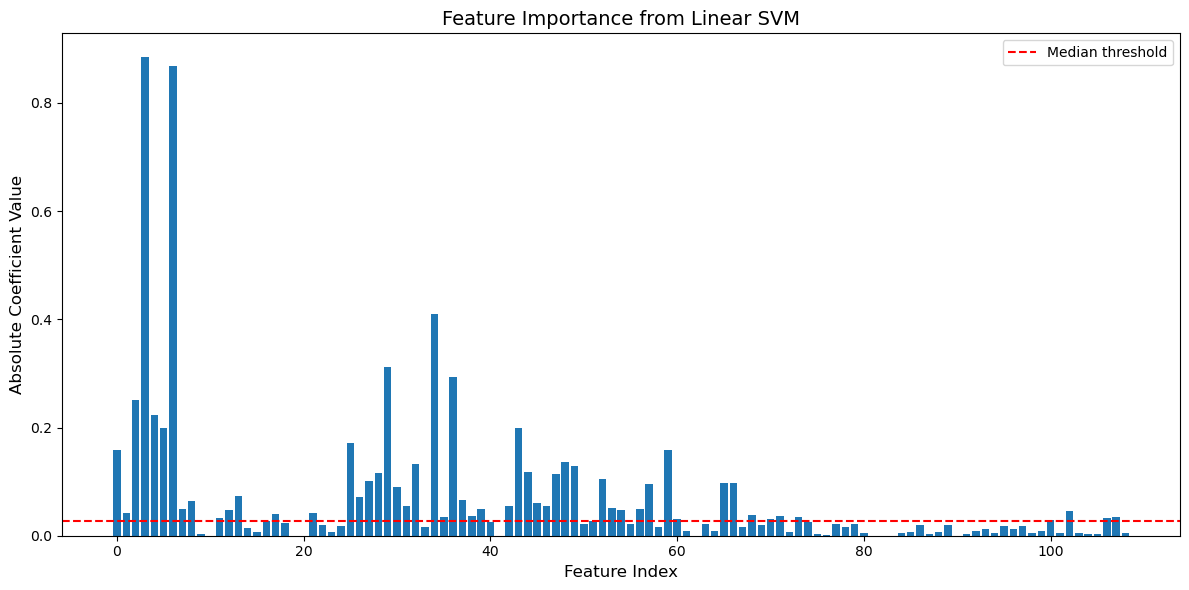

In [ ]:
# Plot feature importance
fig = plt.figure(figsize=(12, 6))
feature_importance = np.abs(svm_linear.coef_[0])
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel("Feature Index", fontsize=12)
plt.ylabel("Absolute Coefficient Value", fontsize=12)
plt.title("Feature Importance from Linear SVM", fontsize=14)
plt.axhline(y=np.median(feature_importance), color='r', linestyle='--', label='Median threshold')
plt.legend()
plt.tight_layout()
plt.show()

**Explanation:**

The plot shows absolute coefficient values from the linear SVM. Features with higher bars have stronger influence on predictions. The red dashed line shows the median. We kept the features above this line and removed features below.

In [ ]:
# Transform X_train_scaled
print("\nOriginal shape:", X_train_scaled.shape)
print("After selection:", select_svm.transform(X_train_scaled).shape)


Original shape: (26048, 109)
After selection: (26048, 55)


**Explanation:**

Feature selection reduced the dataset from 109 to 55 features.

In [ ]:
# Transform test data
x_test_transformed = preprocessor.transform(x_test)
X_test_scaled = scaler.transform(x_test_transformed)
X_test_scaled = X_test_scaled.toarray()

In [ ]:
# Test performance with all features
svm_all = SVC(C=10, gamma=0.01, kernel='poly')
svm_all.fit(X_train_scaled, y_train)
y_pred_all = svm_all.predict(X_test_scaled)

In [ ]:
# Select features
X_train_selected = select_svm.transform(X_train_scaled)
X_test_selected = select_svm.transform(X_test_scaled)

In [ ]:
# Train SVM with selected features
svm_selected = SVC(C=10, gamma=0.01, kernel='poly')
svm_selected.fit(X_train_selected, y_train)
y_pred_selected = svm_selected.predict(X_test_selected)

In [ ]:
# Compare performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("With All 109 features:")
acc_all = accuracy_score(y_test, y_pred_all)
prec_all = precision_score(y_test, y_pred_all)
rec_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)

print(f"  Accuracy:  {acc_all:.4f}")
print(f"  Precision: {prec_all:.4f}")
print(f"  Recall:    {rec_all:.4f}")
print(f"  F1 Score:  {f1_all:.4f}")

print("With selected 55 features:")
acc_sel = accuracy_score(y_test, y_pred_selected)
prec_sel = precision_score(y_test, y_pred_selected)
rec_sel = recall_score(y_test, y_pred_selected)
f1_sel = f1_score(y_test, y_pred_selected)

print(f"  Accuracy:  {acc_sel:.4f}")
print(f"  Precision: {prec_sel:.4f}")
print(f"  Recall:    {rec_sel:.4f}")
print(f"  F1 Score:  {f1_sel:.4f}")

With All 109 features:
  Accuracy:  0.8463
  Precision: 0.7189
  Recall:    0.5958
  F1 Score:  0.6516
With selected 55 features:
  Accuracy:  0.8546
  Precision: 0.7512
  Recall:    0.5939
  F1 Score:  0.6633


**Explanation:**

Comparing the metrics for models with original 109 featues and selected 55 features, we can see that the model performance increased slightly. So, the removded features were sort of redundant.

- Accuracy increased from 84% to 85%
- Precision improved from 71% to 75%, so we have fewer false positives
- Recall is almost same
- F1 Score increased from 65% to 66%

### Data for part 2 (price prediction):
* URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
* Column "price" is the target variable to predict


In [ ]:
# Load the dataset
df = pd.read_csv('vehicles.csv')

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.shape

(426880, 26)

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
df.shape

(426880, 26)

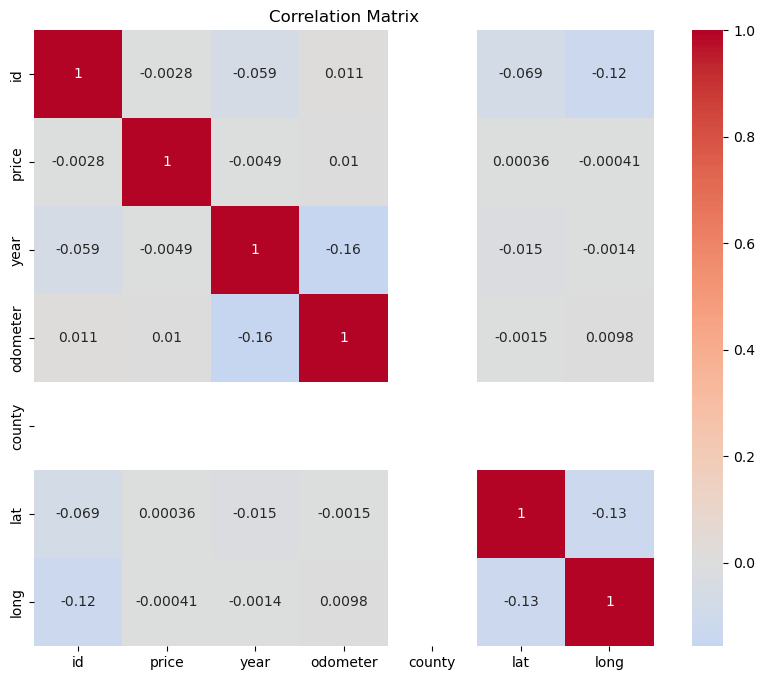

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

**Explanation:**

The above correlation matrix shows relationships between numerical features and price. Year shows slight negative correlation (-0.005), which seems counterintuitive but may be due to data quality issues or the presence of classic/vintage cars.

Odometer has very weak positive correlation (0.01), suggesting minimal linear relationship with price in this dataset. This indicates we'll likely need non-linear models to capture complex pricing patterns.

In [ ]:
# Correlation with price
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print("Correlation with price:\n", corr_with_price)

Correlation with price:
 price       1.000000
odometer    0.010032
lat         0.000357
long       -0.000408
id         -0.002779
year       -0.004925
county           NaN
Name: price, dtype: float64


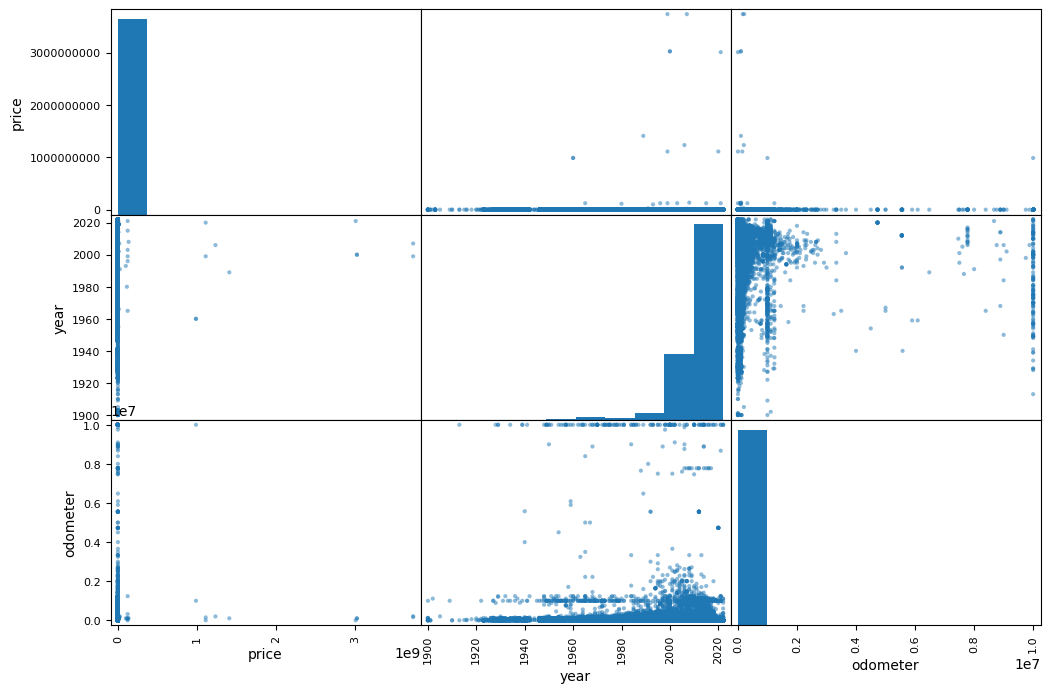

In [ ]:
# Scatter plots for important continuous features
scatter_matrix(df[['price', 'year', 'odometer']], figsize=(12, 8))
plt.show()

**Explanation:**
The scatter matrix reveals:
- Price distribution is heavily right-skewed with many outliers
- Year vs Price shows no clear linear trend
- Odometer vs Price also lacks strong linear relationship
These patterns suggest that price depends on complex interactions between features rather than simple linear relationships, making non-linear models more suitable.

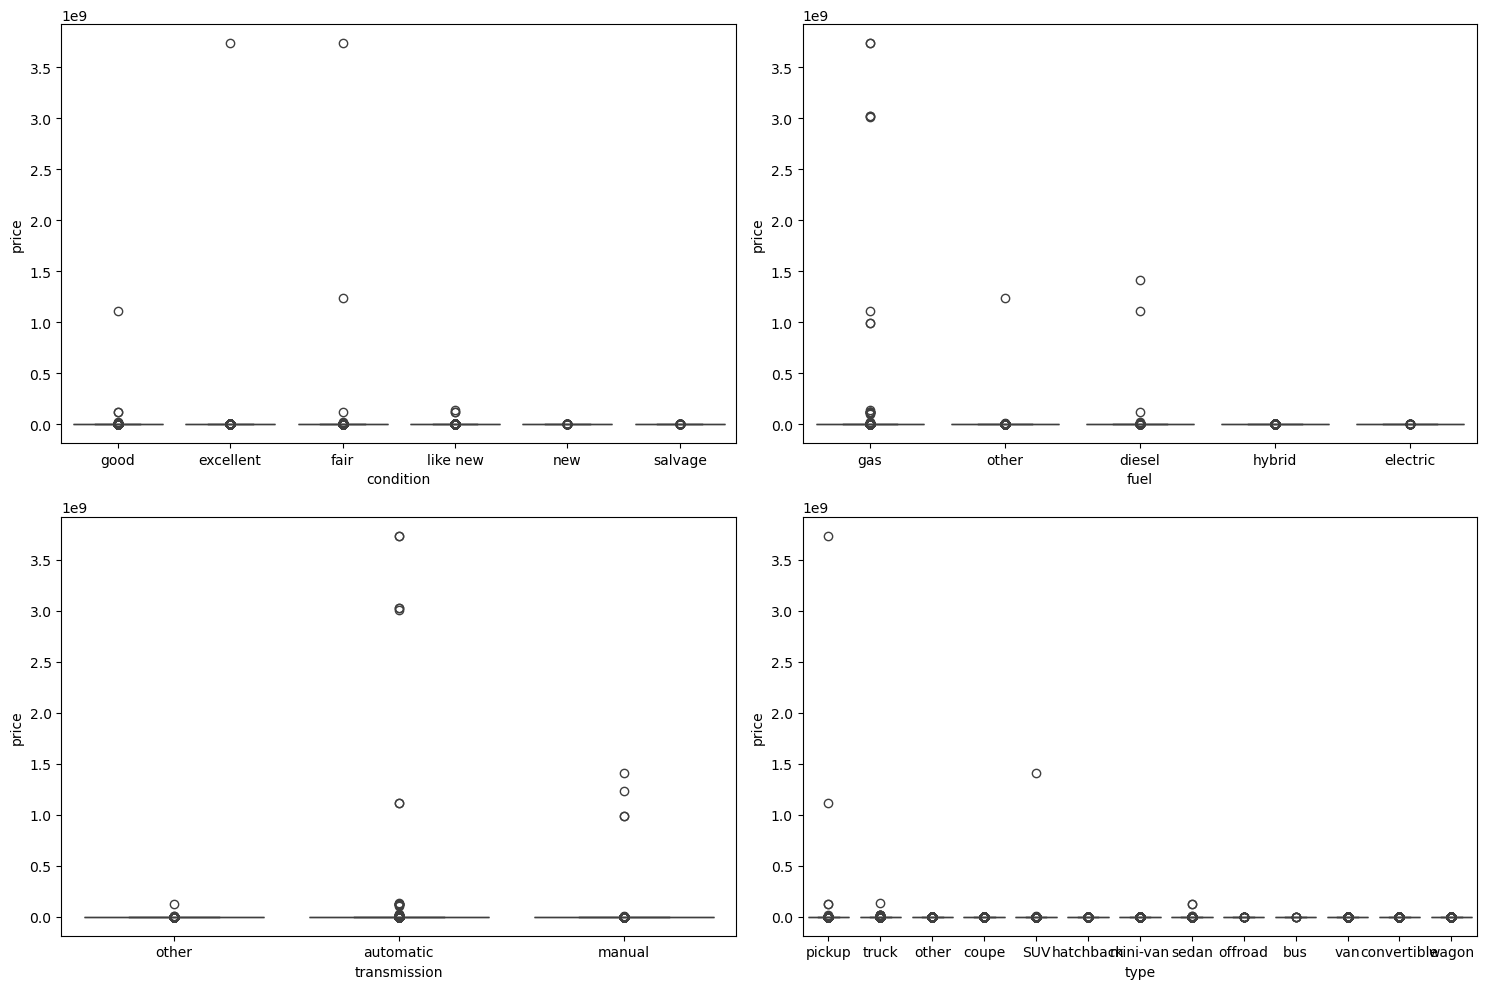

In [ ]:
# Box plots for categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='condition', y='price', data=df, ax=axes[0,0])
sns.boxplot(x='fuel', y='price', data=df, ax=axes[0,1])
sns.boxplot(x='transmission', y='price', data=df, ax=axes[1,0])
sns.boxplot(x='type', y='price', data=df, ax=axes[1,1])
plt.tight_layout()
plt.show()

We selected the catrgorical features manufacturer, condition, fuel, transmission, and type. The categorical box plots for price show that there are several outliers most categories.

Since we are taking a smaple of this data and the original data contains rows with missing values, we will remove the rows with missing values.

In [ ]:
numeric_features = ['year', 'odometer']
categorical_features = ['manufacturer', 'condition', 'fuel', 'transmission', 'type']
features_to_check = numeric_features + categorical_features + ['price']

In [ ]:
df = df.dropna(subset=features_to_check)
df.shape

(209912, 26)

In [ ]:
# Remove outliers for numeric features
df = df[(df['price'] > 1000) & (df['price'] < 100000)]
df = df[(df['odometer'] > 0) & (df['odometer'] <= 300000)]

In [ ]:
for cat_feature in ['manufacturer', 'condition', 'fuel', 'transmission', 'type']:
    """
    Remove outliers in selected categorical features.
    """
    top_categories = df[cat_feature].value_counts().head(10).index
    df = df[df[cat_feature].isin(top_categories)]

**Explanation:**

We removed outliers to improve model training:
- Price: kept values between 1,000 and 100,000, removed unrealistic listings
- Odometer: kept values between 0 and 300,000 miles
- Categorical features: kept only top 10 categories per feature to reduce noise

This reduced the dataset from 209,912 to 124,010 rows.
This removed extreme values that could skew model predictions.

In [ ]:
df.shape

(124010, 26)

We will sample 20,000 out of 124,010 rows.

In [ ]:
# Sample from the clean data
df_sample = df.sample(n=min(20000, len(df)), random_state=42)

X = df_sample[numeric_features + categorical_features]
y = df_sample['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (16000, 7)
Test size: (4000, 7)


Linear Model with Feature Selection

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# Ridge Regression
ridge_pipe = Pipeline([
    ('prep', preprocessor),
    ('regressor', Ridge())
])

ridge_param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_grid, cv=5,
                          scoring='r2', n_jobs=-1, verbose=1)
ridge_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'fuel',
                                                                          'transmission',
                                                                          'type'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='r2', verbose=1)

In [ ]:
# Lasso for feature selection
lasso_pipe = Pipeline([
    ('prep', preprocessor),
    ('regressor', Lasso(max_iter=5000))
])

lasso_param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_grid, cv=5,
                          scoring='r2', n_jobs=-1, verbose=1)
lasso_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'fuel',
                                                                          'transmission',
                                                                          'type'])])),
                                       ('regressor', Lasso(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='r2', verbose=1)

In [ ]:
# Evaluate on test set
y_pred_ridge = ridge_grid.predict(X_test)
y_pred_lasso = lasso_grid.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Ridge - RMSE: ${ridge_rmse:.2f}, R²: {ridge_r2:.4f}")
print(f"Lasso - RMSE: ${lasso_rmse:.2f}, R²: {lasso_r2:.4f}")

Ridge - RMSE: $7864.56, R²: 0.6517
Lasso - RMSE: $7864.61, R²: 0.6517


**Explanation**

Both Ridge and Lasso had a similar performance. The R-squared values for both linear regression models is 0.6517. We will run non-linear regression models in the next section and see if the model performance increases. Lasso didn't eliminate many features and non-linear models will likely perform better.

Random Forest Regressor

In [ ]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_reg)
])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'condition',
                                                   'fuel', 'transmission',
                                                   'type'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

**Explanation:**
We chose Random Forest with 100 trees and max depth of 10 because:
- It handles non-linear relationships and feature interactions well
- It's robust to outliers without requiring extensive preprocessing
- It can capture complex pricing patterns that linear models miss

The max_depth=10 prevents overfitting while allowing sufficient complexity.

Gradient Boosting Regressor

In [ ]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=42)
gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', gb_reg)
])
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'condition',
                                                   'fuel', 'transmission',
                                                   'type'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=5, random_state=42))])

**Explanation:**

For Gradient Boosting we set max_depth=5. This creates shallower trees than Random Forest to prevent overfitting. We set n_estimators=100 which is sufficient iterations for error reduction, and learning_rate=0.1

Model performances on the test set:

In [ ]:
# Random Forest
y_pred_rf = rf_pipe.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"  Test R²:   {rf_r2:.4f}")

  Test R²:   0.8101


In [ ]:
# Gradient Boosting
y_pred_gb = gb_pipe.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"  Test R²:   {gb_r2:.4f}")

  Test R²:   0.8138


**Explanation:**

As we can see above, the random forest and gradient boosting models both performed better than the linear models. This shows that the data has non-linear patterns and running non-linear models captured such pattern better than the linear models.

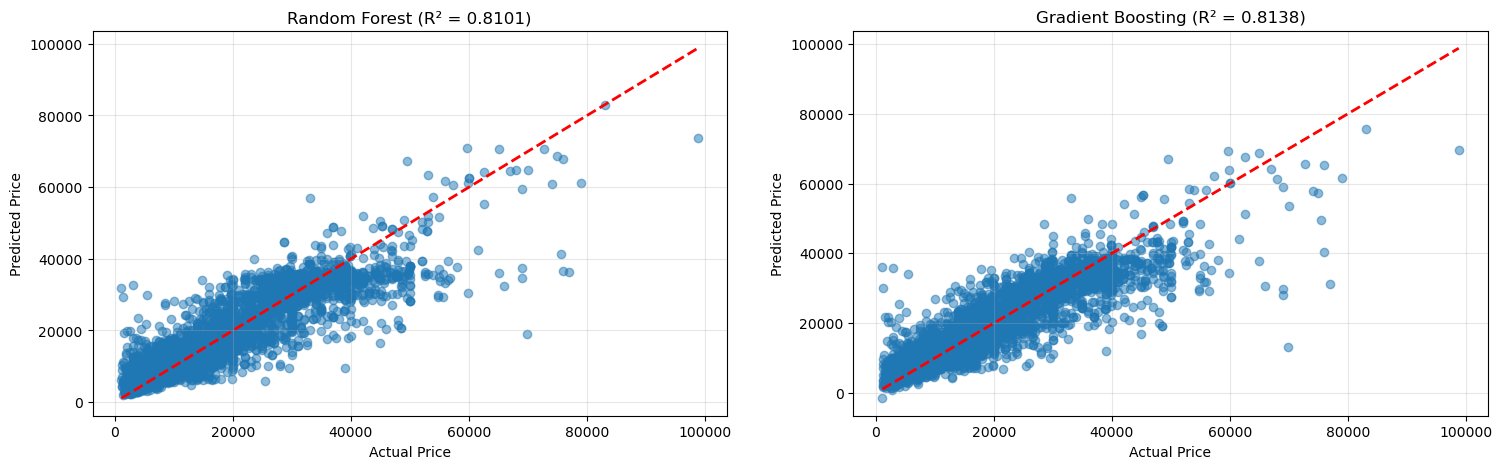

In [ ]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Random Forest
axes[0].scatter(y_test, y_pred_rf, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Random Forest (R² = {rf_r2:.4f})')
axes[0].grid(True, alpha=0.3)

# Gradient Boosting
axes[1].scatter(y_test, y_pred_gb, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title(f'Gradient Boosting (R² = {gb_r2:.4f})')
axes[1].grid(True, alpha=0.3)

**Explanation**:

The above visualization plots show predicted price on y-axis and actual price on x-axix. The r-squared value of 0.81 says that 81% of variance in price can be explained by all the selected features in the model. By running non-linear models, we were able to increase the model performance.